In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df_training = pd.read_csv("/data/MNIST/mnist_train.csv", header = None)

In [6]:
df_training.shape

(60000, 785)

1 st column is the label - 0, 1, 2 ... 9 
Rest are pixel values

In [8]:
y_train = df_training.iloc[:, 0].values

In [37]:
X_train = df_training.iloc[:, 1:].values

In [11]:
np.min(X_train), np.max(X_train)

(0, 255)

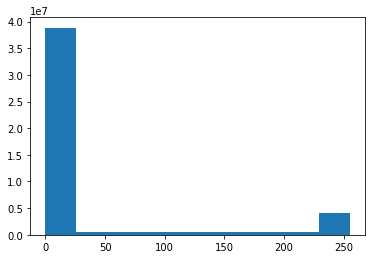

In [13]:
plt.hist(X_train.flatten());

In [15]:
X_train.shape, X_train.flatten().shape

((60000, 784), (47040000,))

In [16]:
60000 * 784

47040000

In [17]:
28 * 28

784

In [21]:
pd.Series(y_train).unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8])

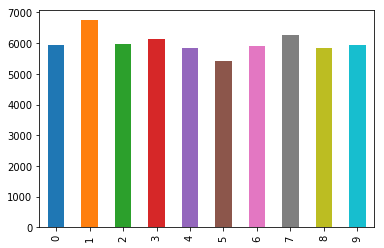

In [24]:
pd.Series(y_train).value_counts().sort_index().plot.bar()

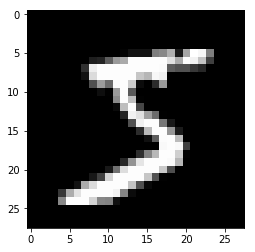

In [27]:
plt.imshow(X_train[0].reshape(28, 28), cmap = "gray")

In [28]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

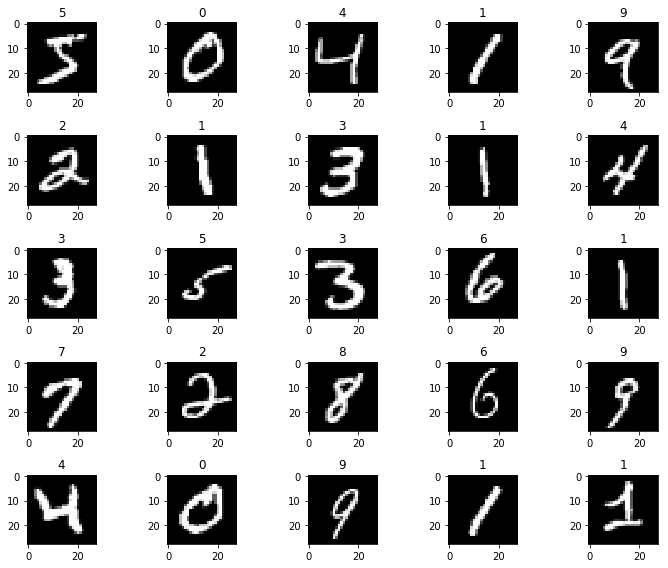

In [31]:
fig, _ = plt.subplots(5, 5, figsize=(10, 8))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap = "gray")
    ax.set_title(y_train[i])

plt.tight_layout()

In [38]:
X_train_std = (X_train - np.mean(X_train, axis = 0)) / (np.std(X_train, axis = 0) + 1e-6)

In [40]:
X_train_std[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.41806870e-03, -5.75481538e-03, -4.08251230e-03, -4.08240582e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.08245443e-03, -4.70966408e-03, -8.79933806e-03, -1.15905536e-02,
       -1.47589748e-02, -1.92848488e-02, -2.46717924e-02, -2.90710219e-02,
       -3.05926529e-02, -3.11640073e-02, -3.19628665e-02, -3.02025303e-02,
       -3.13102123e-02, -2.83833908e-02, -2.31191853e-02, -1.91666208e-02,
       -1.67722956e-02, -1.09963545e-02, -8.32485393e-03, -4.38068813e-03,
        0.00000000e+00,  

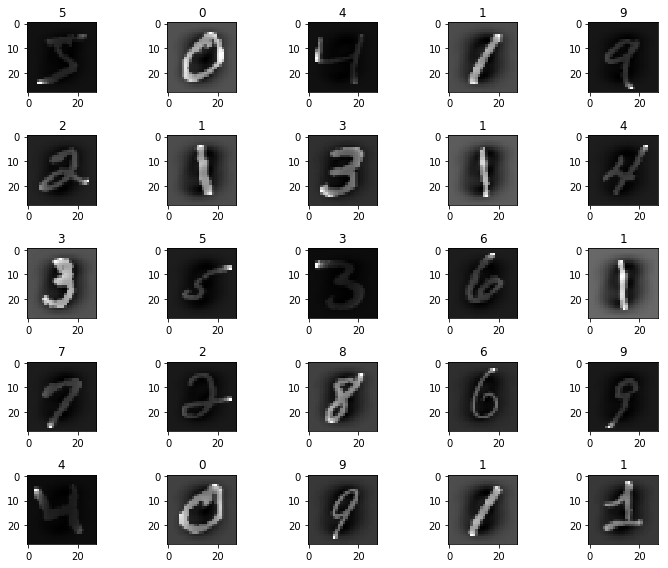

In [41]:
fig, _ = plt.subplots(5, 5, figsize=(10, 8))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_train_std[i].reshape(28, 28), cmap = "gray")
    ax.set_title(y_train[i])

plt.tight_layout()

In [42]:
pd.DataFrame(X_train_std).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.469948e-15,-2.503212e-15,4.799334e-15,4.307646e-15,-2.155776e-15,1.047335e-15,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000005e+00,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.317102e-02,-2.246288e-02,-1.606908e-02,-1.143220e-02,-9.007289e-03,-5.770377e-03,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.317102e-02,-2.246288e-02,-1.606908e-02,-1.143220e-02,-9.007289e-03,-5.770377e-03,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.317102e-02,-2.246288e-02,-1.606908e-02,-1.143220e-02,-9.007289e-03,-5.770377e-03,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.317102e-02,-2.246288e-02,-1.606908e-02,-1.143220e-02,-9.007289e-03,-5.770377e-03,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.200295e+01,6.418126e+01,8.907402e+01,1.499806e+02,1.513373e+02,1.788759e+02,0.0,0.0,0.0,0.0


In [2]:
def load_data(path):
    df = pd.read_csv(path, header = None)
    y = df.iloc[:, 0].values
    X = df.iloc[:, 1:].values/255
    return X, y
    
    
X_train, y_train = load_data("/data/MNIST/mnist_train.csv")
X_test, y_test = load_data("/data/MNIST/mnist_test.csv")

In [3]:
from sklearn import linear_model

In [7]:
%%time
est = linear_model.SGDClassifier(n_jobs=4, tol=1e-4, eta0 = 0.15,  
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 100)
est.fit(X_train, y_train)
print("training accuracy: ", est.score(X_train, y_train), 
      "\ntest accuracy: ", est.score(X_test, y_test))

training accuracy:  0.90145 
test accuracy:  0.907
CPU times: user 7.89 s, sys: 199 ms, total: 8.09 s
Wall time: 3.53 s


In [8]:
import tensorflow as tf

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


tensor = multi dimensional array

- constant - constant used for computation
- variable - intermediate variables to store data ... these are mutable. typicaly used to store weights
- placeholders like function argumnet - typically used to supply training features and labels to tensorflow graph

In [45]:
a = tf.constant(3.4)
b = tf.constant(4.5)
x = tf.constant(np.array([[1, 2, 3], [4, 5, 9]]))
c = a + b
print("a", a)
print("b", b)
print("c", c)
print("x", x)

with tf.Session() as sess:
    c_ = sess.run(c)
    print("c value", c_)

a Tensor("Const_18:0", shape=(), dtype=float32)
b Tensor("Const_19:0", shape=(), dtype=float32)
c Tensor("add_12:0", shape=(), dtype=float32)
x Tensor("Const_20:0", shape=(2, 3), dtype=int64)
c value 7.9


In [47]:
a = tf.placeholder("float32")
b = tf.placeholder("float32")
c = a + b

with tf.Session() as sess:
    values = {a: 2.3, b: 7.8}
    print(sess.run(c, feed_dict=values))


10.1


In [53]:

X = tf.placeholder("float32", (None, 784))
y = tf.placeholder("int32", (None,))
num_classes = 10
learning_rate = 0.1
max_iters = 50

print("X", X)
print("y", y)

y_oh = tf.one_hot(y, num_classes)
print("y_oh", y_oh)

W = tf.Variable(tf.truncated_normal((784, 10), stddev=1/num_classes))
b = tf.Variable(0.0)
print("W",W)
print("b", b)

Z = tf.matmul(X, W) + b
print("Z", Z)

logits = Z
print("logits", logits)

y_probs = tf.nn.softmax(logits)
print(")

y_pred = tf.argmax(logits, axis=1, output_type=tf.int32)
print("y_probs", y_probs)

loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_oh, logits = logits) # record level amount of "error"
cost = tf.reduce_mean(loss) # aggregated "error"

match = tf.equal(y, y_pred)
print("match", match)

accuracy = tf.reduce_mean(tf.cast(match, "float32"))
print("accuracy", accuracy)

opt = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #W_ = sess.run(W)
    #print("Initial value of W", W_)
    #plt.hist(W_.flatten(), bins = 100);
    values = {X: X_train, y: y_train}
    costs = []
    
    for i in range(max_iters):
        _, cost_, accuracy_ = sess.run([opt, cost, accuracy], feed_dict=values)
        costs.append(cost_)
        print("i: %d, cost: %f, accuracy: %f" % (i, cost_, accuracy_))
        

X Tensor("Placeholder_56:0", shape=(?, 784), dtype=float32)
y Tensor("Placeholder_57:0", shape=(?,), dtype=int32)
y_oh Tensor("one_hot_7:0", shape=(?, 10), dtype=float32)
W <tf.Variable 'Variable_35:0' shape=(784, 10) dtype=float32_ref>
b <tf.Variable 'Variable_36:0' shape=() dtype=float32_ref>
Z Tensor("add_18:0", shape=(?, 10), dtype=float32)
logits Tensor("add_18:0", shape=(?, 10), dtype=float32)
Tensor("ArgMax_8:0", shape=(?,), dtype=int32)
match Tensor("Equal_6:0", shape=(?,), dtype=bool)
accuracy Tensor("Mean_11:0", shape=(), dtype=float32)
i: 0, cost: 2.581244, accuracy: 0.091983
i: 1, cost: 2.384707, accuracy: 0.137917
i: 2, cost: 2.254408, accuracy: 0.187900
i: 3, cost: 2.147553, accuracy: 0.242383
i: 4, cost: 2.053975, accuracy: 0.295467
i: 5, cost: 1.969482, accuracy: 0.344383
i: 6, cost: 1.892035, accuracy: 0.389233
i: 7, cost: 1.820538, accuracy: 0.431950
i: 8, cost: 1.754329, accuracy: 0.469833
i: 9, cost: 1.692934, accuracy: 0.504333
i: 10, cost: 1.635963, accuracy: 0.53

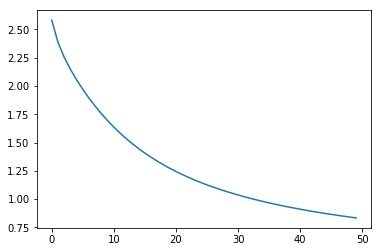

In [54]:
pd.Series(costs).plot()

In [65]:
import keras
from keras.layers import Dense, InputLayer
from time import time

In [68]:
tensorboard = keras.callbacks.TensorBoard(log_dir="/tmp/tf/tensorboard/%d/" % time())

model = keras.Sequential()
model.add(InputLayer((784,)))
model.add(Dense(400, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy
              , optimizer="sgd"
              , metrics=["accuracy"])
model.fit(X_train, keras.utils.to_categorical(y_train), epochs=10, callbacks=[tensorboard])

Epoch 1/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.5695 - acc: 0.8568
Epoch 2/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.2779 - acc: 0.9208
Epoch 3/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.2276 - acc: 0.9358
Epoch 4/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.1941 - acc: 0.9444
Epoch 5/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.1689 - acc: 0.9518
Epoch 6/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.1492 - acc: 0.9579
Epoch 7/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.1329 - acc: 0.9626
Epoch 8/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.1201 - acc: 0.9663
Epoch 9/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.1090 - acc: 0.9695
Epoch 10/10
60000/60000 [==============================] - 12s 204us/step - loss: 

In [61]:
y_train.shape

(60000,)

In [62]:
keras.utils.to_categorical(y_train).shape

(60000, 10)

In [63]:
keras.utils.to_categorical(y_train)[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [70]:
np.argmax(keras.utils.to_categorical(y_train)[:5], axis = 1)[:5]

array([5, 0, 4, 1, 9])

In [64]:
y_train[:5]

array([5, 0, 4, 1, 9])

# Tensorboard

Open command prompt and go to the directory of tensorboard
```
$ tensorboard --logdir=.
```


In [72]:
Y_probs = model.predict_proba(X_test)

In [73]:
Y_probs.shape

(10000, 10)

In [76]:
Y_probs[1]

array([1.48928648e-05, 5.94922632e-04, 9.82804596e-01, 1.45478733e-02,
       6.08319937e-08, 1.12701720e-03, 4.20152297e-04, 1.04228794e-08,
       4.90396167e-04, 2.87257218e-09], dtype=float32)

2


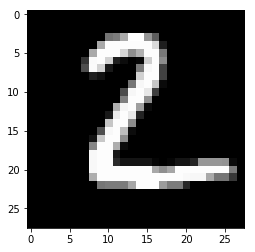

In [79]:
print(np.argmax(Y_probs, axis = 1)[1])
plt.imshow(X_test[1].reshape(28, 28), cmap="gray")

In [81]:
from skimage.io import imread

In [92]:
img = imread("https://yourshot.nationalgeographic.com/u/fQYSUbVfts-T7odkrFJckdiFeHvab0GWOfzhj7tYdC0uglagsDNfPyOWLSTLFY4MU96_S349qkXL9l9Mgn-gPMRAD0h5UkQaN8K32bvT0TXvGmuPnhPdkOfNh7Ff-vdRes_SyPhkPSxSyt3hw6fLkhJC05gvEuSj5_EHHGcmhXRQjKPBnfETUI6DFh9livSBrj_75XZpJzjPsiUxm-PDGS5xImHZ3OE/")

In [93]:
img.shape

(1199, 1600, 3)

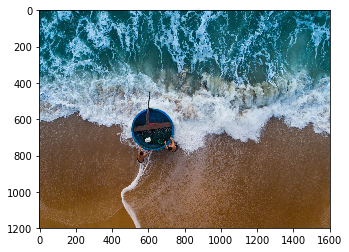

In [94]:
plt.imshow(img)

In [95]:
type(img)

numpy.ndarray

In [96]:
from skimage.color import rgb2gray

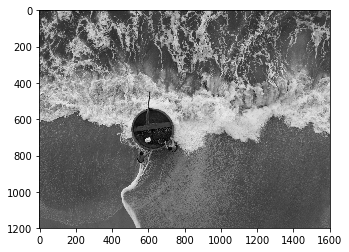

In [97]:
plt.imshow(rgb2gray(img), cmap= "gray")

In [103]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [101]:
X_train.shape

(60000, 784)

In [105]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [106]:
pca = PCA()
pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

<Container object of 784 artists>

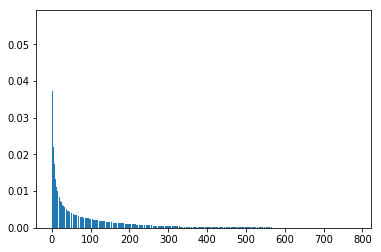

In [109]:
plt.bar(range(784), pca.explained_variance_ratio_)

In [111]:
explained = np.cumsum(pca.explained_variance_ratio_)

In [113]:
pd.Series(explained)[explained>0.99]

542    0.990088
543    0.990183
544    0.990276
545    0.990369
546    0.990462
547    0.990554
548    0.990646
549    0.990737
550    0.990827
551    0.990917
552    0.991006
553    0.991094
554    0.991182
555    0.991269
556    0.991357
557    0.991444
558    0.991530
559    0.991615
560    0.991700
561    0.991784
562    0.991869
563    0.991953
564    0.992037
565    0.992120
566    0.992202
567    0.992284
568    0.992366
569    0.992447
570    0.992527
571    0.992608
         ...   
754    1.000000
755    1.000000
756    1.000000
757    1.000000
758    1.000000
759    1.000000
760    1.000000
761    1.000000
762    1.000000
763    1.000000
764    1.000000
765    1.000000
766    1.000000
767    1.000000
768    1.000000
769    1.000000
770    1.000000
771    1.000000
772    1.000000
773    1.000000
774    1.000000
775    1.000000
776    1.000000
777    1.000000
778    1.000000
779    1.000000
780    1.000000
781    1.000000
782    1.000000
783    1.000000
Length: 242, dtype: floa

In [116]:
np.sum(pca.explained_variance_ratio_[:543])

0.9900884932287412

In [131]:
pca = PCA(543)
X_train_pca = pca.fit_transform(X_train)

In [132]:
X_train_pca.shape

(60000, 543)

In [133]:
X_train_recon = pca.inverse_transform(X_train_pca)
X_train_recon.shape

(60000, 784)

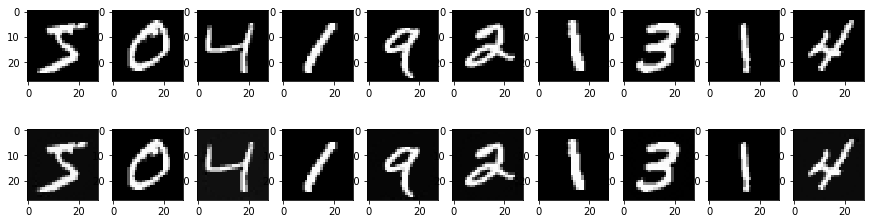

In [134]:
fig, axes = plt.subplots(2, 10, figsize = (15, 4))
for i in range(10):
    axes[0][i].imshow(X_train[i].reshape(28, 28), cmap = "gray")
    axes[1][i].imshow(X_train_recon[i].reshape(28, 28), cmap = "gray")
    

In [144]:
X_train_noisy = X_train[:10] 
X_train_noisy = X_train_sub + 0.3 * np.random.randn(* X_train_sub.shape)
X_train_noisy.shape

(10, 784)

In [145]:
X_train_noisy_recon = pca.inverse_transform(pca.transform(X_train_noisy))

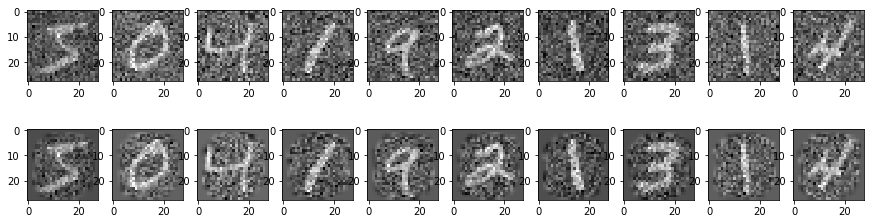

In [146]:
fig, axes = plt.subplots(2, 10, figsize = (15, 4))
for i in range(10):
    axes[0][i].imshow(X_train_noisy[i].reshape(28, 28), cmap = "gray")
    axes[1][i].imshow(X_train_noisy_recon[i].reshape(28, 28), cmap = "gray")

In [147]:
X_train_pca.shape

(60000, 543)

In [148]:
tensorboard = keras.callbacks.TensorBoard(log_dir="/tmp/tf/tensorboard/%d/" % time())

model = keras.Sequential()
model.add(InputLayer((543,)))
model.add(Dense(400, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy
              , optimizer="sgd"
              , metrics=["accuracy"])
model.fit(X_train_pca, keras.utils.to_categorical(y_train), epochs=10, callbacks=[tensorboard])

Epoch 1/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.6353 - acc: 0.8379
Epoch 2/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.2489 - acc: 0.9275
Epoch 3/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.1897 - acc: 0.9451
Epoch 4/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.1559 - acc: 0.9549
Epoch 5/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.1332 - acc: 0.9620
Epoch 6/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.1163 - acc: 0.9665
Epoch 7/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.1033 - acc: 0.9706
Epoch 8/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0924 - acc: 0.9734
Epoch 9/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0835 - acc: 0.9761
Epoch 10/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.0760 - a

In [149]:
X_test_pca = pca.transform(X_test)

In [151]:
model.evaluate(X_test_pca, keras.utils.to_categorical(y_test))

10000/10000 [==============================] - 1s 56us/step


[0.09044237442985177, 0.9719]

In [159]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [161]:
tensorboard = keras.callbacks.TensorBoard(log_dir="/tmp/tf/tensorboard/%d/" % time())

model = keras.Sequential()
model.add(InputLayer((28,28,1)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(400, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy
              , optimizer="sgd"
              , metrics=["accuracy"])
model.fit(X_train.reshape((-1, 28, 28, 1))
          , keras.utils.to_categorical(y_train)
          , epochs=10
          , callbacks=[tensorboard])

Epoch 1/10
60000/60000 [==============================] - 49s 822us/step - loss: 0.4984 - acc: 0.8534
Epoch 2/10
60000/60000 [==============================] - 43s 720us/step - loss: 0.1346 - acc: 0.9594
Epoch 3/10
60000/60000 [==============================] - 45s 757us/step - loss: 0.0935 - acc: 0.9704
Epoch 4/10
60000/60000 [==============================] - 46s 770us/step - loss: 0.0734 - acc: 0.9774
Epoch 5/10
60000/60000 [==============================] - 48s 800us/step - loss: 0.0626 - acc: 0.9804
Epoch 6/10
60000/60000 [==============================] - 46s 772us/step - loss: 0.0535 - acc: 0.9838
Epoch 7/10
60000/60000 [==============================] - 46s 770us/step - loss: 0.0466 - acc: 0.9854
Epoch 8/10
60000/60000 [==============================] - 48s 796us/step - loss: 0.0418 - acc: 0.9868
Epoch 9/10
60000/60000 [==============================] - 51s 847us/step - loss: 0.0381 - acc: 0.9882
Epoch 10/10
60000/60000 [==============================] - 50s 827us/step - loss: 

In [162]:
model.evaluate(X_test.reshape((-1, 28, 28, 1))
          , keras.utils.to_categorical(y_test))

10000/10000 [==============================] - 3s 293us/step


[0.03776566733485088, 0.9864]

In [156]:
X_train[0].reshape((28, 28, 1)).shape

(28, 28, 1)